In [1]:
%load_ext autoreload

In [2]:
import os
os.sys.path.append(os.path.join(os.path.abspath('.'), '..'))

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import numpy as np
from scipy.spatial import Delaunay

In [13]:
matplotlib.rc('font', size=20)

In [5]:
from ml.preprocess import PreprocessBatch

In [6]:
case_name = 'Rc_1.0_h_20.2_tac_10.0_tel_6.0'

path_mesh = {case_name: os.path.join('..', 'data', 'raw', 'mesh', case_name + '.mesh')}
path_vtu = {case_name: os.path.join('..', 'data', 'raw', 'vtu', case_name + '.vtu')}

features = ['boundary', 'surface', 'edge']

In [8]:
pp = PreprocessBatch(is_train=True, path_output=(os.path.join('.', )), feature_name=features, grid_dim=(512, 64))
pp.populate(case_name, path_mesh, path_vtu)
pp.compile(do_standardize=False)

pp.x_mesh[case_name].shape, pp.x.shape

100%|██████████| 1/1 [00:00<00:00, 2809.31it/s]


[INFO] encoding geometry ...
[INFO] interpolating features ...



100%|██████████| 1/1 [00:00<00:00, 1104.93it/s]

[INFO] interpolating solutions ...


((5582, 23), (1, 512, 64, 23))

In [7]:
pp_small = PreprocessBatch(is_train=True, path_output=(os.path.join('.', )), feature_name=features, grid_dim=(128, 16))
pp_small.populate(case_name, path_mesh, path_vtu)
pp_small.compile(do_standardize=False)

pp_small.x_mesh[case_name].shape, pp_small.x.shape

100%|██████████| 1/1 [00:00<00:00, 1678.39it/s]


[INFO] encoding geometry ...
[INFO] interpolating features ...



100%|██████████| 1/1 [00:00<00:00, 1333.64it/s]

[INFO] interpolating solutions ...


((5582, 23), (1, 128, 16, 23))

In [9]:
boundary_idx = [idx for idx in range(0, 10)]
surface_idx = [idx for idx in range(10, 13)]
edge_idx = [idx for idx in range(13, 23)]

In [98]:
def make_mesh(mesh_data):
    mesh = Delaunay(mesh_data['coord'])
    mesh.simplices = np.array(mesh_data['connect'])

    return mesh

mesh = make_mesh(pp.mesh_data[case_name])
mesh

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


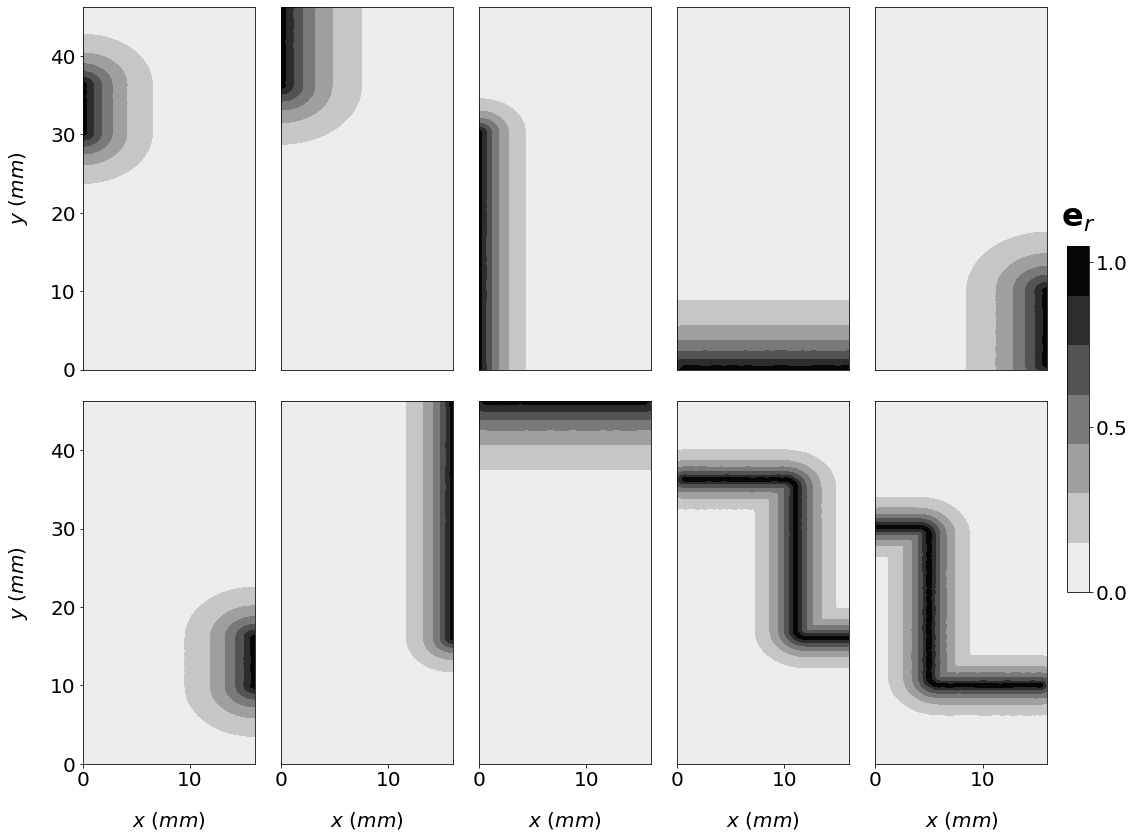

In [99]:
fig, axs = plt.subplots(2, len(boundary_idx)//2, figsize=(15, 12))
axs = [j for i in axs for j in i]

for idx, ax in enumerate(axs):
    field = pp.x_mesh[case_name].iloc[:, idx]
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    im = ax.tricontourf(triangulation, field, vmin=0, vmax=1, extent=[0, 16, 0, 46], cmap='gray_r');
    
    # im = ax.imshow(pp.x[0, :, :, idx], extent=[0, 16, 0, 46], vmin=0, vmax=1, cmap='gray_r')
    ax.set_xticks([0, 10])
    
    if (idx == 4) or (idx == 10):
        # divider = make_axes_locatable(ax)
        # cax = divider.append_axes("right", size="10%", pad=0.2)
        cbar_ax = fig.add_axes([1, 0.3, 0.02, 0.4])
        cbar_ax.set_xlabel('$\mathbf{e}_r$', rotation=0, labelpad=20, fontsize=32)
        cbar_ax.xaxis.set_label_position('top') 

        fig.colorbar(im, cax=cbar_ax, ticks=[0, 0.5, 1.0], boundaries=np.linspace(0, 1))
    
    ax.set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
    ax.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
    
    if idx in range(5):
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_xlabel('')
        
    if (idx in range(1, 5)) or (idx in range(6, 11)):
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_ylabel('')
        
plt.tight_layout(pad = 1);

fig.savefig('./boundary.pdf', fomat='pdf', bbox_inches='tight')

(5582,) (5582, 2)
(5582,) (5582, 2)
(5582,) (5582, 2)


/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


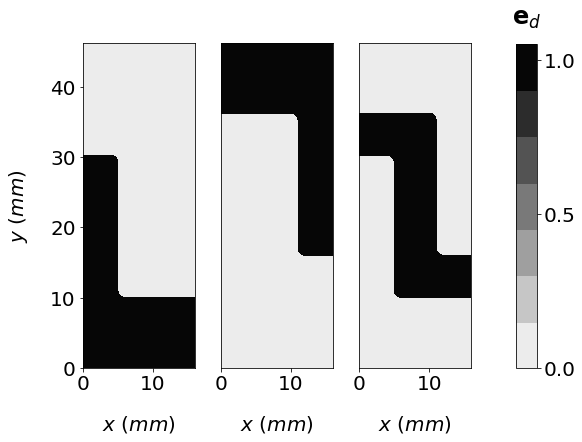

In [102]:
fig, axs = plt.subplots(1, len(surface_idx), figsize=(7, 6))

for idx, ax in enumerate(axs):
    field = pp.x_mesh[case_name].iloc[:, surface_idx[idx]]
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    print(field.shape, mesh.points.shape)
    im = ax.tricontourf(triangulation, field, vmin=0, vmax=1, extent=[0, 16, 0, 46], cmap='gray_r');
    
    # im = ax.imshow(pp.x[0, :, :, surface_idx[idx]], extent=[0, 16, 0, 46], vmin=0, vmax=1, cmap='gray_r')
    ax.set_xticks([0, 10])
    
    ax.set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
    ax.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
    
    if idx == 2:
        # divider = make_axes_locatable(ax)
        # cax = divider.append_axes("right", size="10%", pad=0.2)
        cbar_ax = fig.add_axes([1.05, 0.2, 0.04, 0.75])
        cbar_ax.set_xlabel('$\mathbf{e}_d$', rotation=0, labelpad=20, fontsize=24)
        cbar_ax.xaxis.set_label_position('top') 
        
        plt.colorbar(im, cax=cbar_ax, ticks=[0, 0.5, 1.0], boundaries=np.linspace(0, 1))
        
    if (idx == 1) or (idx == 2):
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_ylabel('')
        
plt.tight_layout(pad=1);

fig.savefig('./domain.pdf', fomat='pdf', bbox_inches='tight')

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


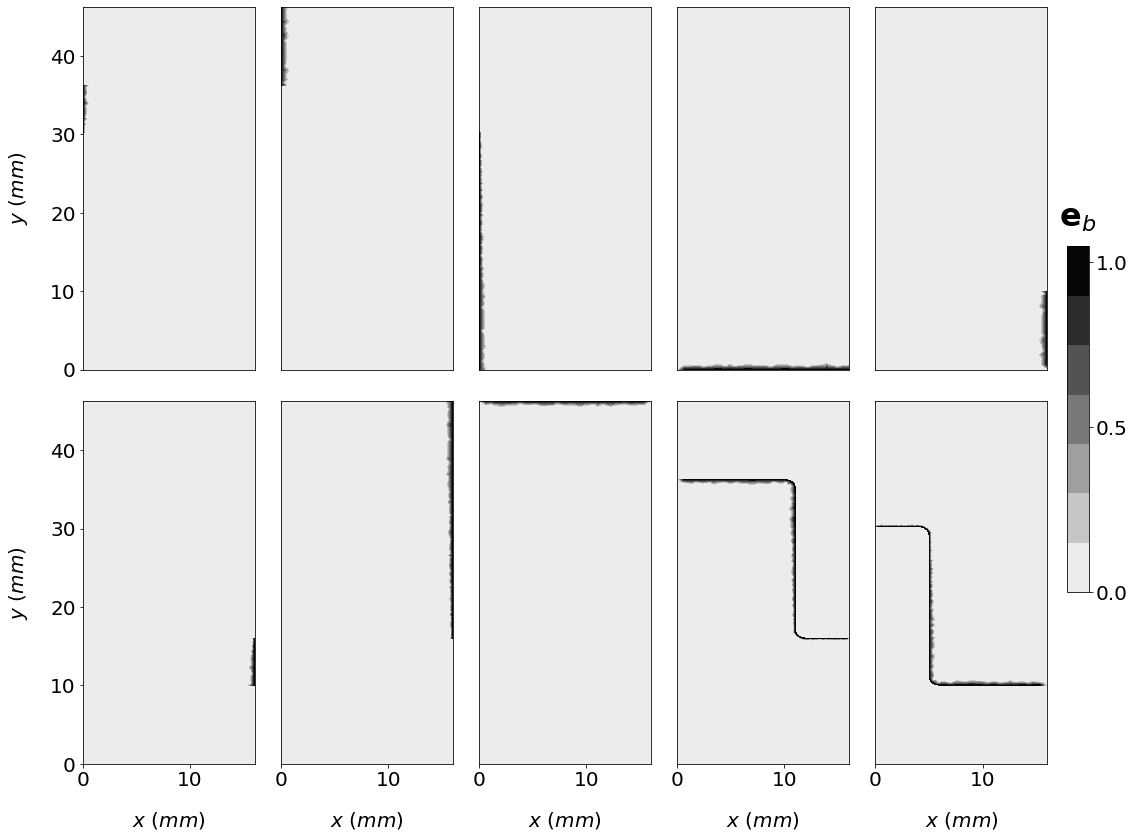

In [101]:
fig, axs = plt.subplots(2, len(edge_idx)//2, figsize=(15, 12))
axs = [j for i in axs for j in i]

for idx, ax in enumerate(axs):
    field = pp.x_mesh[case_name].iloc[:, edge_idx[idx]]
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    im = ax.tricontourf(triangulation, field, vmin=0, vmax=1, extent=[0, 16, 0, 46], cmap='gray_r');
    
    # im = ax.imshow(pp.x[0, :, :, edge_idx[idx]], extent=[0, 16, 0, 46], cmap='gray_r', vmin=0, vmax=1)
    
    ax.set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
    ax.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
    
    if (idx == 5) or (idx == 11):
        divider = make_axes_locatable(ax)
        # cax = divider.append_axes("right", size="10%", pad=0.2)
        cbar_ax = fig.add_axes([1, 0.3, 0.02, 0.4])
        cbar_ax.set_xlabel('$\mathbf{e}_b$', rotation=0, labelpad=20, fontsize=32)
        cbar_ax.xaxis.set_label_position('top') 
        
        plt.colorbar(im, cax=cbar_ax, ticks=[0, 0.5, 1.0], boundaries=np.linspace(0, 1))
        
    if idx in range(5):
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_xlabel('')
        
    if (idx in range(1, 5)) or (idx in range(6, 11)):
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_ylabel('')
        
plt.tight_layout(pad=1);

fig.savefig('./edge.pdf', fomat='pdf', bbox_inches='tight')

# solutions

In [103]:
def make_mesh(vtu):
    mesh = Delaunay(vtu['coord'])
    mesh.simplices = vtu['connect']
    
    return mesh

mesh = make_mesh(pp.vtu_data[case_name])

In [104]:
x_grid = pp.grid['grid'][:, 0].reshape(*pp.grid['dim'])
y_grid = pp.grid['grid'][:, 1].reshape(*pp.grid['dim'])

x_grid_small = pp_small.grid['grid'][:, 0].reshape(*pp_small.grid['dim'])
y_grid_small = pp_small.grid['grid'][:, 1].reshape(*pp_small.grid['dim'])

In [105]:
def plot_mesh_value(mesh, values_nodes, ax, vmin, vmax, levels=100, cmap='seismic'):
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    ax_cont = ax.tricontourf(triangulation, values_nodes, extent=[0, 16, 0, 46], origin='image', 
                             vmin=vmin, vmax=vmax, levels=levels, cmap=cmap);
        
    return ax_cont


def plot_mesh(mesh, ax):
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    ax.triplot(triangulation, color='b', linewidth=.1, alpha=1.0);
    

def plot_grid_value(x_grid, y_grid, grid_values, ax, vmin=None, vmax=None, levels=100, cmap='seismic'):
    ax_cont = ax.contourf(x_grid, y_grid, grid_values, vmin=vmin, vmax=vmax, levels=levels, cmap=cmap)
    # ax.scatter(x_grid, y_grid, color='r', s=10)
    return ax_cont

In [106]:
field_names = ['_'.join(str(c) for c in cs) for cs in pp.vtu_data[case_name]['solutions'].columns]
field_names

['deformations_0',
 'deformations_1',
 'deformations_2',
 'stresses_0',
 'stresses_1',
 'stresses_2',
 'stresses_3',
 'currents_0',
 'currents_1',
 'currents_2',
 'fluxes_0',
 'fluxes_1',
 'fluxes_2']

In [107]:
field_new_names = [
    '$\epsilon_{xx}$',
    '$\epsilon_{yy}$',
    '$\epsilon_{xy}$',
    '$\sigma_{xx}$',
    '$\sigma_{yy}$',
    '$\sigma_{zz}$',
    '$\sigma_{xy}$',
    '$\phi$',
    '$i_x$',
    '$i_y$',
    '$c/c_0$',
    '$h_x~$',
    '$h_y~$',
]

field_map = dict(zip(field_names, field_new_names))
field_map

{'deformations_0': '$\\epsilon_{xx}$',
 'deformations_1': '$\\epsilon_{yy}$',
 'deformations_2': '$\\epsilon_{xy}$',
 'stresses_0': '$\\sigma_{xx}$',
 'stresses_1': '$\\sigma_{yy}$',
 'stresses_2': '$\\sigma_{zz}$',
 'stresses_3': '$\\sigma_{xy}$',
 'currents_0': '$\\phi$',
 'currents_1': '$i_x$',
 'currents_2': '$i_y$',
 'fluxes_0': '$c/c_0$',
 'fluxes_1': '$h_x~$',
 'fluxes_2': '$h_y~$'}

In [108]:
def get_vals(idx, pp0):
    field_name = pp0.vtu_data[case_name]['solutions'].columns[idx]
    field_name = '_'.join([str(f) for f in field_name])

    grid_values = pp0.y[0, :, :, idx]
    node_values = pp0.vtu_data[case_name]['solutions'].iloc[:, idx]

    if (field_name == 'fluxes_1') or (field_name == 'fluxes_2'):
        grid_values *= 10000
        node_values *= 10000

    vmin = node_values.min()
    vmax = node_values.max()
    
    return field_name, grid_values, node_values, vmin, vmax

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


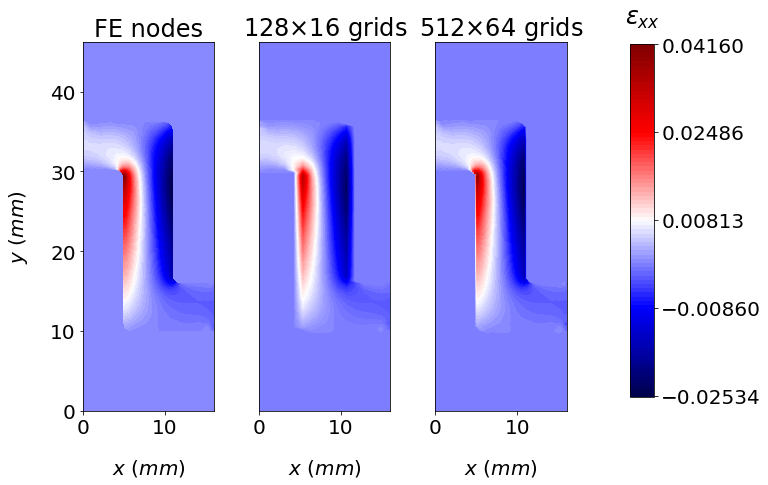

In [112]:
idx = 0

vals = get_vals(idx, pp)
vals_small = get_vals(idx, pp_small)


fig, axs = plt.subplots(1, 3, figsize=(8.5, 7))

im1 = plot_mesh_value(mesh, node_values, axs[0], vmin=vmin, vmax=vmax, cmap='seismic')
im2 = plot_grid_value(x_grid, y_grid, vals[1], axs[2], vmin=vals[-2], vmax=vals[-1], cmap='seismic')
im3 = plot_grid_value(x_grid_small, y_grid_small, vals_small[1], axs[1], vmin=vals_small[-2], vmax=vals_small[-1], cmap='seismic')

axs[0].set_title('FE nodes')
axs[2].set_title('512$\\times$64 grids')
axs[1].set_title('128$\\times$16 grids')

axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_yticklabels([])

axs[0].set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
axs[1].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
axs[2].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
axs[0].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

# cbar_ax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
cbar_ax = fig.add_axes([1.05, 0.2, 0.04, 0.7])
cbar_ax.set_xlabel(field_map[vals[0]], rotation=0, labelpad=20, fontsize=24)
cbar_ax.xaxis.set_label_position('top') 

ticks = [v for v in np.linspace(vmin, vmax, 5)]
    
cb = plt.colorbar(im1, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=1)

fig.savefig('./interp_bad_good.pdf', fomat='pdf', bbox_inches='tight')

In [24]:
c0 = 1.5e-15

In [25]:
pp.y.shape

(1, 512, 64, 13)

# compare two size of inputs

In [119]:
case_names = [
    'Rc_1.0_h_21.5_tac_10.0_tel_19.7', 
    'Rc_1.0_h_42.4_tac_10.0_tel_7.0',
    'Rc_1.0_h_58.0_tac_10.0_tel_11.1'
]


path_mesh = {c: os.path.join('..', 'data', 'raw', 'mesh', c + '.mesh') for c in case_names}
path_vtu = {c: os.path.join('..', 'data', 'raw', 'vtu', c + '.vtu') for c in case_names}

features = ['boundary', 'surface', 'edge']

pp = PreprocessBatch(is_train=True, path_output=(os.path.join('.', )), feature_name=features, grid_dim=(512, 64))

pp.populate(case_names, path_mesh, path_vtu)

pp.compile(do_standardize=False)

reading file: (2) Rc_1.0_h_58.0_tac_10.0_tel_11.1


100%|██████████| 3/3 [00:00<00:00, 38.88it/s]

[INFO] encoding geometry ...
[INFO] interpolating features ...



100%|██████████| 3/3 [00:00<00:00, 402.74it/s]

[INFO] interpolating solutions ...


In [120]:
pp.x.shape

(3, 512, 64, 23)

In [121]:
pp.mask.shape

(3, 512, 64, 1)

In [122]:
x_grid = pp.grid['grid'][:, 0].reshape(*pp.grid['dim'])
y_grid = pp.grid['grid'][:, 1].reshape(*pp.grid['dim'])

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


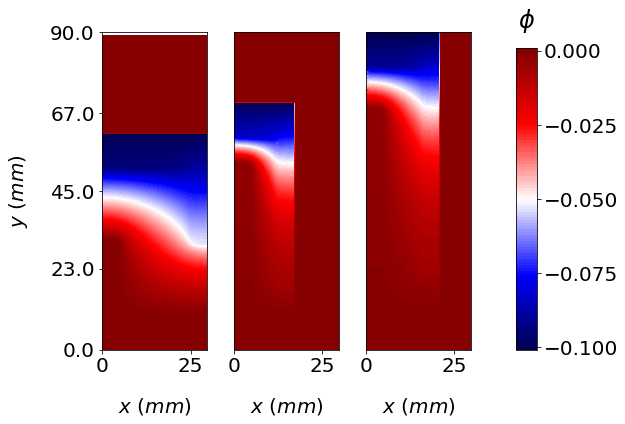

In [124]:
fidx = -6

fig, axs = plt.subplots(1, 3, figsize=(7, 6))

vmin = pp.y[0, :, :, fidx].min()
vmax = pp.y[0, :, :, fidx].max()

im1 = plot_grid_value(x_grid, y_grid, pp.y[0, :, :, fidx], axs[0], cmap='seismic')
im2 = plot_grid_value(x_grid, y_grid, pp.y[1, :, :, fidx], axs[1], cmap='seismic')
im2 = plot_grid_value(x_grid, y_grid, pp.y[2, :, :, fidx], axs[2], cmap='seismic')


axs[0].set_yticklabels([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])
axs[0].set_yticks([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])
axs[0].set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
axs[0].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)


cbar_ax = fig.add_axes([1.05, 0.2, 0.04, 0.7])
cbar_ax.set_xlabel('$\\phi$', rotation=0, labelpad=20, fontsize=24)
cbar_ax.xaxis.set_label_position('top')

ticks = [v for v in np.linspace(vmin, vmax, 5)]
    
plt.colorbar(im1, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=1)

fig.savefig('./stack_sol.pdf', fomat='pdf', bbox_inches='tight')

In [31]:
x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()

(0.0, 29.738405, 0.0, 89.13828)

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


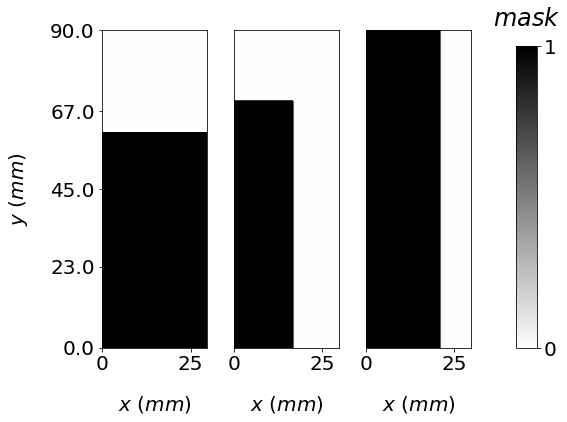

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(7, 6))

im1 = plot_grid_value(x_grid, y_grid, pp.mask[0, :, :, 0].astype(int), axs[0], vmin=0, vmax=1, cmap='gray_r')
im2 = plot_grid_value(x_grid, y_grid, pp.mask[1, :, :, 0].astype(int), axs[1], vmin=0, vmax=1, cmap='gray_r')
im3 = plot_grid_value(x_grid, y_grid, pp.mask[2, :, :, 0].astype(int), axs[2], vmin=0, vmax=1, cmap='gray_r')


axs[0].set_yticklabels([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])
axs[0].set_yticks([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])
axs[0].set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
axs[0].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$x~(mm)$', rotation=0, labelpad=20)


cbar_ax = fig.add_axes([1.05, 0.2, 0.04, 0.7])
cbar_ax.set_xlabel('$mask$', rotation=0, labelpad=20, fontsize=24)
cbar_ax.xaxis.set_label_position('top') 

ticks = [0, 1]
    
plt.colorbar(im1, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=1)

fig.savefig('./stack_mask.pdf', fomat='pdf', bbox_inches='tight')